## Objective
Our goal is to make a classification model that can be used to predict something within the DIABETES 130-US HOSPITALS FOR YEARS 1999-2008 dataset.
We will try to predict whether a patient is likely to be a readmit in the hospital within 30 days given certain features such as age, gender, insulin, number of hospital visits etc.

To accomplish our goal we will be using two models; KNN and Decision Tree

## Exploring the Data


In [ ]:
#Importing all the necessery libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#loading the diabetic data set without missing values
df = pd.read_csv('https://raw.githubusercontent.com/nafeeur/cuny_data_analytics/main/Python/Unit4/diabetic_data.csv',na_values=['?'])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
len(df) # The amount of rows the data contains

101766

In [ ]:
df.head(5) #The first 5 rows of the data set

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
#An statistical overview of the dataset
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [ ]:
df.columns # A better view of the Columns 

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [ ]:
df.isna().sum() # Looking for the missing data in the set

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

Text(0.5, 1.0, 'Missing Data')

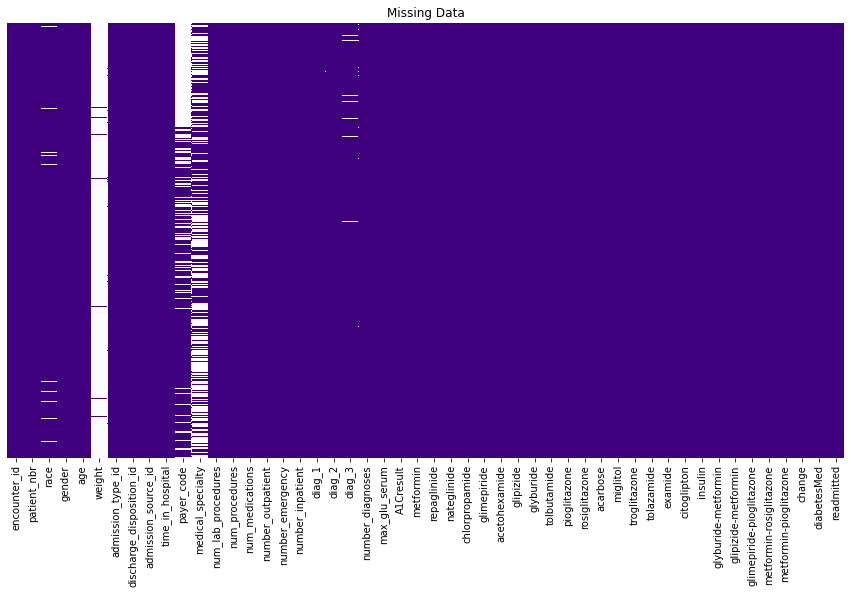

In [ ]:
# Visualizing the missing data set
plt.figure(figsize=(15, 8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Purples_r')
plt.title('Missing Data')

In [ ]:
# The percent of data that is missing 
100*(df.isnull().sum()/len(df))
def missing_values_percent(df):
    nan_percent=100*(df.isnull().sum()/len(df))
    nan_percent=nan_percent[nan_percent>0].sort_values()
    return(nan_percent)
nan_percent=missing_values_percent(df)
nan_percent

diag_1                0.020636
diag_2                0.351787
diag_3                1.398306
race                  2.233555
payer_code           39.557416
medical_specialty    49.082208
weight               96.858479
dtype: float64

## Further Analyzing and Cleaning the Data

In [ ]:
# From the data we can see that "Payer_code", "Medical_Speciality" and "Weight" are missing a significant amount of data. So we will drop those columns.
df.drop(['payer_code','weight','medical_specialty'],axis=1,inplace=True)


In [ ]:
# Now we are going to analize rest of the columns by looking for the unique values in each columns

for i in df.columns:
  print(i+": ",df[i].unique())


encounter_id:  [  2278392    149190     64410 ... 443854148 443857166 443867222]
patient_nbr:  [  8222157  55629189  86047875 ... 140199494 120975314 175429310]
race:  ['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']
gender:  ['Female' 'Male' 'Unknown/Invalid']
age:  ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
admission_type_id:  [6 1 2 3 4 5 8 7]
discharge_disposition_id:  [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
admission_source_id:  [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
time_in_hospital:  [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
num_lab_procedures:  [ 41  59  11  44  51  31  70  73  68  33  47  62  60  55  49  75  45  29
  35  42  66  36  19  64  25  53  52  87  27  37  46  28  48  72  10   2
  65  67  40  54  58  57  43  32  83  34  39  69  38  56  22  96  78  61
  88  50   1  18  82   9  63  24  71  77  81  76  90  93   3 103  13  80
  85  16  15  12  

In [ ]:
#We can remove the following columns since we don't have further explantion, in addtion to the ID columns as those will not affect our prediction.

df.drop(['encounter_id','admission_type_id','discharge_disposition_id',
                    'metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','admission_source_id',
                     'acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','max_glu_serum','A1Cresult',
                     'acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','glyburide-metformin','diag_1','diag_2','diag_3',
                     'glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone', 'patient_nbr'],axis=1,inplace=True) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


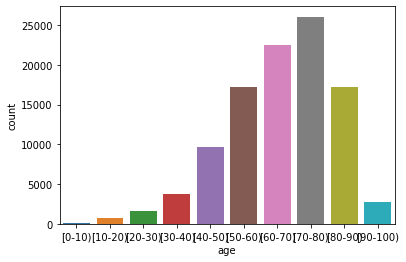

In [ ]:
#We will now further analyze some of the data

sns.countplot(df['age'])

#The plot shows that the dataset contains more info on older adults and seniors than other ages

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


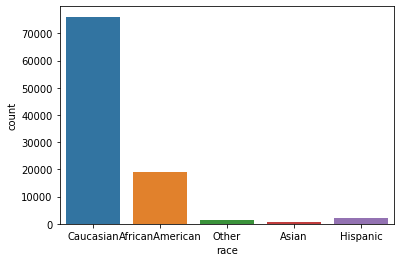

In [ ]:
sns.countplot(df['race'])
#We can see that most people in this dataset are caucasian, with low representaion of other groups

In [ ]:
# So we can include non-white groups into "minority" category 
df["race"].replace(['AfricanAmerican', 'Hispanic', 'Asian','Other'], 'Minority',inplace=True)

In [ ]:
df.columns #Remaining Columns
# We will be using the following collumns as our feature value and 'readmitted' for our target 

Index(['race', 'gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses', 'insulin',
       'change', 'diabetesMed', 'readmitted'],
      dtype='object')

Columns to be used for feature :
* num_lab
* race                  
* gender                          
* age                             
* insulin            
* number_inpatient     
* time_in_hospital                
* num_medications                 
* number_emergency                
* number_diagnoses                
* change                          
* diabetesMed.
* number_outpatient


In [ ]:
df['gender'].unique()
# We will include the "unknown/Invalid" in "Male" column since the data is miniscule
df['gender'].replace('Unknown/Invalid','Male', inplace=True)

##Preparing Data for model

In [ ]:
#We will categorize the non-numerical values for our dataset
df.race.replace({'Caucasian':1,'Minority':0, np.nan:0},inplace=True)
df.gender.replace({'Female': 1, 'Male': 0}, inplace=True)
df.age.replace({ '[0-10)':5, '[10-20)':15, '[20-30)':25, '[30-40)':35, '[40-50)':45, '[50-60)':55, '[60-70)':65, '[70-80)':75, '[80-90)':85, '[90-100)':95}, inplace=True)
df.insulin.replace({'No':0,'Up':1,'Steady':2,'Down':3},inplace=True) 
df.diabetesMed.replace({'No':0,'Yes':1},inplace=True)
df.change.replace({'No':0,'Ch':1},inplace=True)

#Target Variablw
df.readmitted.replace({'NO': 0, '>30': 0, '<30': 1}, inplace=True) # Since we want to find wheather a patient will be readmitted
# "within 30 days", we will include "outside of 30 days" with "No"



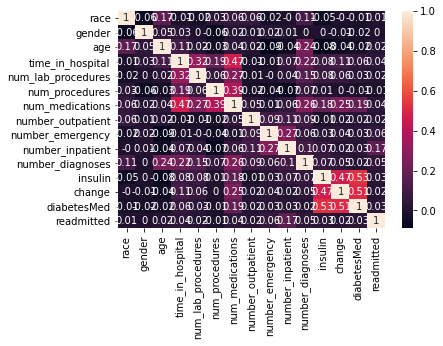

In [ ]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot = True ) # The correlation matrix gives us a better idea of the overall realtionship between different variables 

#Data Scalling

In [ ]:
# We will normalize our dataset through scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


scaler.fit(df.drop('readmitted', axis=1))
StandardScaler(copy=True, with_mean=True, with_std=True)
scaled_features = scaler.transform(df.drop('readmitted',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

#Training - Predicting - Evaluating the Model using KNN

For this model we will be using the 14 features data set to predict our model for the target variable "Readmitted within 30 days"

In [ ]:
#Importing libraries and Preparing for training and testing the data-set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['readmitted'], test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


knn = KNeighborsClassifier(n_neighbors=25) # Using k = 25
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test) #Predicting the model by 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.890242704136779


In [ ]:
print(confusion_matrix(y_test,y_pred)) #Our confusion Matrix 

[[18095    17]
 [ 2217    25]]


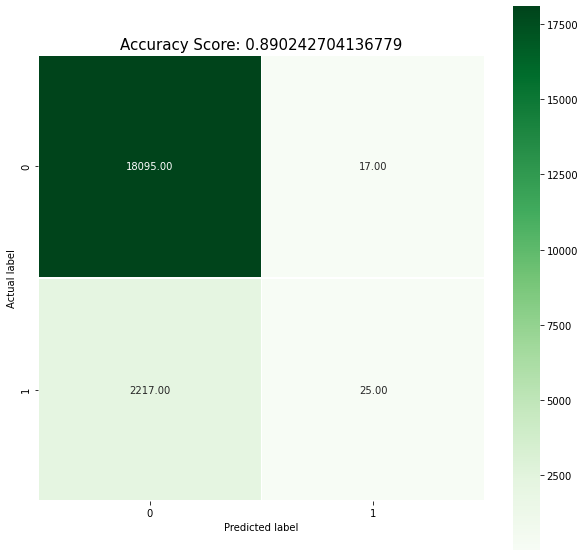

In [ ]:
plt.figure(figsize=(10,10)) #Visualizing confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(knn.score(X_test, y_test))
plt.title(all_sample_title, size = 15);

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18112
           1       0.60      0.01      0.02      2242

    accuracy                           0.89     20354
   macro avg       0.74      0.51      0.48     20354
weighted avg       0.86      0.89      0.84     20354



#Training - Predicting - Evaluating the Model using Decision Tree

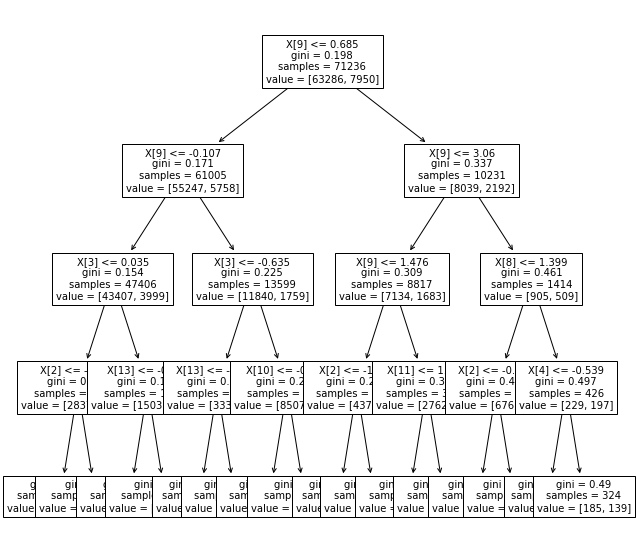

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #

X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['readmitted'], test_size=0.3, random_state=1, stratify=df['readmitted'])
#
# Train the model using DecisionTree classifier
#
clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
clf_tree.fit(X_train, y_train)
#
# Plot the decision tree
#
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clf_tree, fontsize=10)
plt.show()


In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7862757943006878


In [ ]:
#testing how big of a factor just race, gender, and age play on 
y = df['readmitted']
x = df[["race", "gender","age"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy for KNN:",metrics.accuracy_score(y_test, y_pred))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
predict = clf.predict(x_test)
print("Accuracy for Decision Tree:",metrics.accuracy_score(y_test, predict))

Accuracy for KNN: 0.8878353149258131
Accuracy for Decision Tree: 0.8873440110052078


## Conclusion



From the models we can see that after using our feature variables we found that the KNN model had a higher success rate than decision tree. In other words, it proved to be more efficient. However, if we only include "race", "gender" and "age" for our feature variables then the difference between the two models significantly diminshes. 